In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
df_airline.dropna(axis=0,inplace=True)

In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df_airline.set_index('Month',inplace=True)

In [12]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

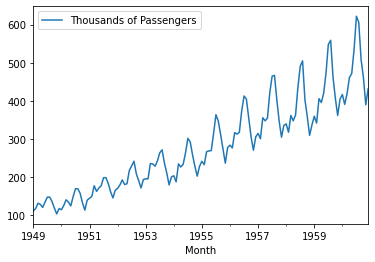

In [13]:
df_airline.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060423
p- value: 0.9918802434376409
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [17]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [18]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [19]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699874
p- value: 0.05421329028382711
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [21]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468513
p- value: 2.7328918500142026e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [22]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [23]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924805
p- value: 0.011551493085514982
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

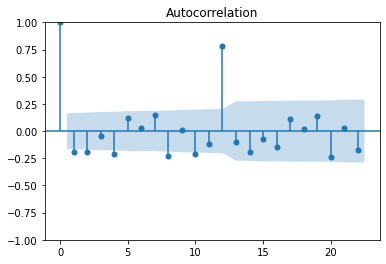

In [25]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

C:\Users\argha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


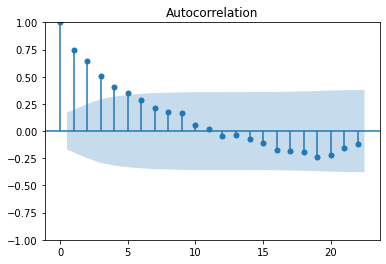

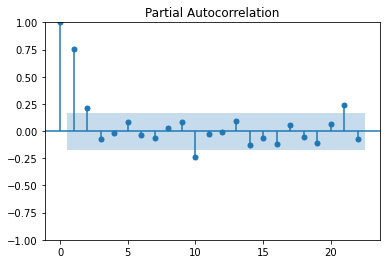

In [26]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

C:\Users\argha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


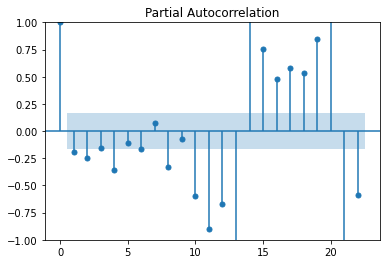

In [27]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

C:\Users\argha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


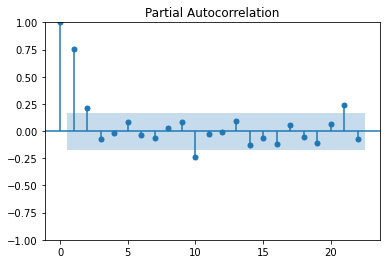

In [28]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [29]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [30]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [31]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [32]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [33]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [39]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [40]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [66]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(12,2,10))

C:\Users\argha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\argha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\argha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [67]:
model_Arima_fit=model_ARIMA.fit()

C:\Users\argha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\argha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\argha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [68]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(12, 2, 10)   Log Likelihood                -306.315
Date:                     Sat, 25 Mar 2023   AIC                            658.630
Time:                             19:20:25   BIC                            713.984
Sample:                         01-01-1949   HQIC                           680.854
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1825      0.779     -0.234      0.815      -1.709       1.344
ar.L2         -0.3002      0.585     -0.513      0.608      -1.447       0.847
ar.L3         -0.2685      0.718     -0.374      0.709      -1.676       1.139
ar.L4         -0.2060      0.593     -0.347      0.728      -1.369       0.956
ar.L5         -0.3416      0.671     -0.509      0.611      -1.657       0.974
ar.L6         -0.1490      0.640     -0.233      0.816      -1.404       1.106
ar.L7         -0.3206      0.581     -0.552      0.581      -1.459       0.818
ar.L8         -0.2901      0.611     -0.475      0.635      -1.487       0.907
ar.L9         -0.2495      0.656     -0.380      0.704      -1.536       1.037
ar.L10        -0.3007      0.547     -0.550      0.582      -1.372       0.771
ar.L11        -0.1531      0.653     -0.235      0.815      -1.432       1.126
ar.L12         0.5679      0.515      1.104      0.270      -0.441       1.576
ma.L1         -1.0034      0.933     -1.076      0.282      -2.832       0.825
ma.L2          0.1708      1.169      0.146      0.884      -2.121       2.463
ma.L3         -0.1614      1.149     -0.140      0.888      -2.414       2.091
ma.L4         -0.0080      1.077     -0.007      0.994      -2.119       2.103
ma.L5          0.3357      1.012      0.332      0.740      -1.647       2.319
ma.L6         -0.4587      0.956     -0.480      0.632      -2.333       1.416
ma.L7          0.4375      0.709      0.617      0.537      -0.953       1.828
ma.L8         -0.3530      0.478     -0.739      0.460      -1.290       0.583
ma.L9          0.3829      0.399      0.961      0.337      -0.398       1.164
ma.L10        -0.2943      0.224     -1.316      0.188      -0.733       0.144
sigma2        83.7339     25.222      3.320      0.001      34.300     133.168
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.20
Prob(Q):                              0.72   Prob(JB):                         0.33
Heteroskedasticity (H):               2.10   Skew:                             0.38
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,300.183612,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,309.478354,NaN
1956-03-01,317.0,40.0,47.0,50.0,316.443014,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,307.827542,NaN
1956-05-01,318.0,5.0,9.0,48.0,318.544231,NaN
1956-06-01,374.0,56.0,51.0,59.0,348.922080,NaN
1956-07-01,413.0,39.0,-17.0,49.0,366.020284,403.396598
1956-08-01,405.0,-8.0,-47.0,58.0,346.567531,385.069542
1956-09-01,355.0,-50.0,-42.0,43.0,332.120966,349.443618


In [70]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [71]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [72]:
pred

1956-01-01    286.374839
1956-02-01    280.394915
1956-03-01    300.775797
1956-04-01    308.231333
1956-05-01    310.829618
1956-06-01    352.360486
1956-07-01    398.248071
1956-08-01    374.032557
1956-09-01    346.444216
1956-10-01    308.987032
1956-11-01    278.204357
1956-12-01    309.563824
1957-01-01    322.120143
1957-02-01    311.508672
1957-03-01    326.486488
1957-04-01    337.214322
1957-05-01    340.511226
1957-06-01    385.591745
1957-07-01    426.691436
1957-08-01    403.566240
1957-09-01    376.274267
1957-10-01    342.551104
1957-11-01    315.798840
1957-12-01    341.556717
1958-01-01    355.753939
1958-02-01    341.953558
1958-03-01    352.749298
1958-04-01    365.445168
1958-05-01    371.207230
1958-06-01    417.273086
1958-07-01    455.350886
1958-08-01    432.861993
1958-09-01    405.867615
1958-10-01    376.416168
1958-11-01    352.574114
1958-12-01    374.401786
1959-01-01    388.622730
1959-02-01    372.445524
1959-03-01    379.629521
1959-04-01    393.788584


In [73]:
residuals

Month
1956-01-01     -2.374839
1956-02-01     -3.394915
1956-03-01     16.224203
1956-04-01      4.768667
1956-05-01      7.170382
1956-06-01     21.639514
1956-07-01     14.751929
1956-08-01     30.967443
1956-09-01      8.555784
1956-10-01     -2.987032
1956-11-01     -7.204357
1956-12-01     -3.563824
1957-01-01     -7.120143
1957-02-01    -10.508672
1957-03-01     29.513512
1957-04-01     10.785678
1957-05-01     14.488774
1957-06-01     36.408255
1957-07-01     38.308564
1957-08-01     63.433760
1957-09-01     27.725733
1957-10-01      4.448896
1957-11-01    -10.798840
1957-12-01     -5.556717
1958-01-01    -15.753939
1958-02-01    -23.953558
1958-03-01      9.250702
1958-04-01    -17.445168
1958-05-01     -8.207230
1958-06-01     17.726914
1958-07-01     35.649114
1958-08-01     72.138007
1958-09-01     -1.867615
1958-10-01    -17.416168
1958-11-01    -42.574114
1958-12-01    -37.401786
1959-01-01    -28.622730
1959-02-01    -30.445524
1959-03-01     26.370479
1959-04-01      2.2

<AxesSubplot:ylabel='Density'>

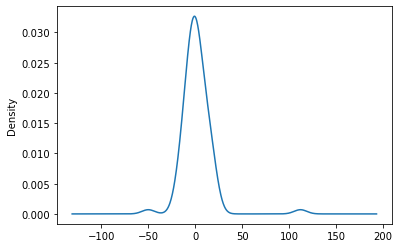

In [74]:
model_Arima_fit.resid.plot(kind='kde')

In [75]:
test_data['Predicted_ARIMA']=pred

C:\Users\argha\AppData\Local\Temp\ipykernel_12552\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Month'>

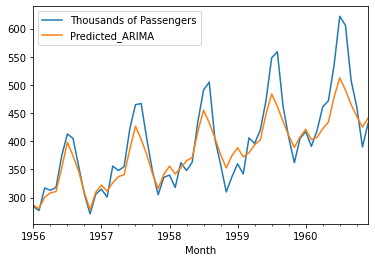

In [76]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

C:\Users\argha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


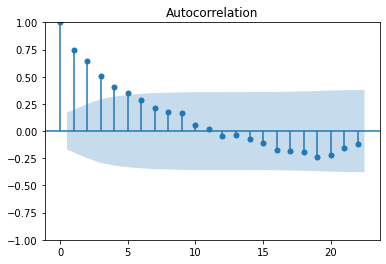

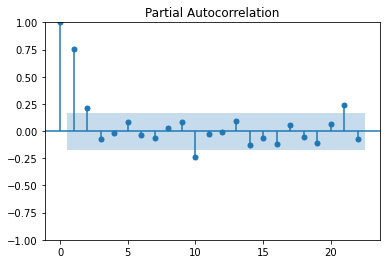

In [77]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [78]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [79]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\argha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\argha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [80]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\argha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [81]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Sat, 25 Mar 2023   AIC                            548.481
Time:                                     19:20:38   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5984      0.937      0.638      0.523      -1.239       2.436
ar.L2          0.8311      0.232      3.581      0.000       0.376       1.286
ar.L3         -0.4526      0.894     -0.507      0.613      -2.204       1.299
ma.L1          0.1837      1.164      0.158      0.875      -2.097       2.465
ma.L2         -0.5342      1.262     -0.423      0.672      -3.007       1.938
ma.L3         -0.0986      0.384     -0.257      0.797      -0.851       0.654
ma.L4         -0.1272      0.337     -0.377      0.706      -0.788       0.534
ma.L5          0.2471      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7321     81.097      1.082      0.279     -71.214     246.679
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,491.053770,460.245589
1960-09-01,508.0,-98.0,-82.0,45.0,465.248077,422.832872
1960-10-01,461.0,-47.0,51.0,54.0,444.042546,381.645412
1960-11-01,390.0,-71.0,-24.0,28.0,425.115574,342.276294
1960-12-01,432.0,42.0,113.0,27.0,441.104487,380.301436


In [83]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [84]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<AxesSubplot:xlabel='Month'>

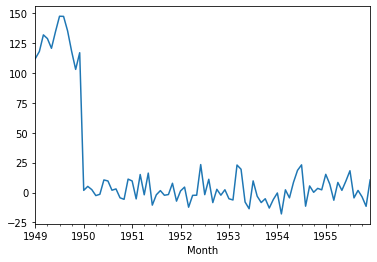

In [85]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

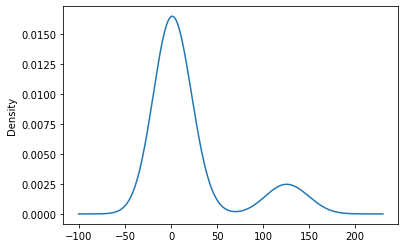

In [86]:
model_SARIMA_fit.resid.plot(kind='kde')

In [87]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\argha\AppData\Local\Temp\ipykernel_12552\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [88]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,286.374839,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,280.394915,NaN
1956-03-01,317.0,40.0,47.0,50.0,300.775797,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,308.231333,NaN
1956-05-01,318.0,5.0,9.0,48.0,310.829618,NaN
1956-06-01,374.0,56.0,51.0,59.0,352.360486,NaN
1956-07-01,413.0,39.0,-17.0,49.0,398.248071,403.396598
1956-08-01,405.0,-8.0,-47.0,58.0,374.032557,385.069542
1956-09-01,355.0,-50.0,-42.0,43.0,346.444216,349.443618


<AxesSubplot:xlabel='Month'>

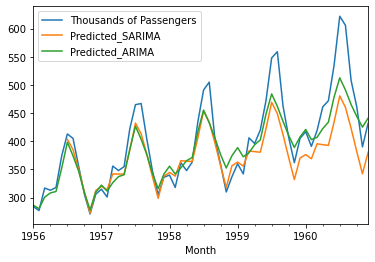

In [89]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()